# Counterfactual explanations

wildboar can explain predictions of nearest neighbors classifiers and shapelet forest classifiers
using counterfactual samples. In this scenario, counterfactuals are samples that
are transformed such that the labeling of the sample changes. For instance,
we might want to explain what changes are required to transforms a sample
labeled as `abnormal` to `normal`. In this scenario, the normal sample would
be the counterfactual sample.

In wildboar, counterfactual explainers are in the module ``wildboar.explain.counterfactual``.
The easiest way to generate counterfactuals is to use the function ``counterfactuals``:

In [1]:
from wildboar.explain.counterfactual import counterfactuals

Currently, the classifiers that supports counterfactual explanations are ``ShapeletForestClassifier`` and ``KNearestNeighborsClassifier`` from ``wildboar`` and ``scikit-learn`` respectively. Model agnostic counterfactual explanations can be provided for any other estimators.

To have more control over the generation of counterfactual samples, the classes ``KNeighborsCounterfactual`` and ``ShapeletForestCounterfactuals`` can be used. They implement the interface of ``BaseCounterfactuals`` which exposes two methods ``fit(estimator)`` and ``transform(x, y)``, where the former fits a counterfactual explainer to an estimator and the latter transform the i:th sample of `x` to a sample labeled as the i:th label in `y`.

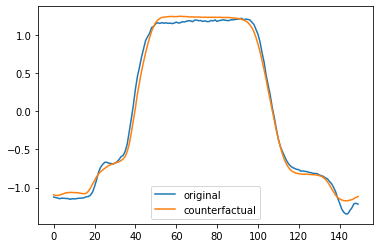

In [9]:
import matplotlib.pylab as plt
from wildboar.datasets import load_dataset
from wildboar.explain.counterfactual import KNeighborsCounterfactual
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = load_dataset("GunPoint", merge_train_test=False)
clf = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
clf.fit(x_train, y_train)